In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
C = np.sin(np.linspace(1,5,80)) * 5
NC = C + .5 * np.random.randn(80)

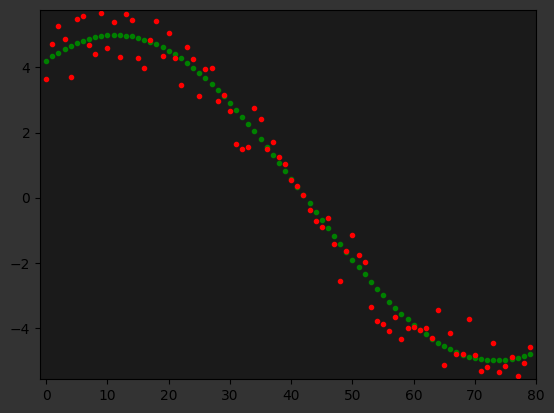

In [3]:
plt.figure(facecolor='0.2')
plt.axes().set_facecolor('0.1')
plt.axis([-1,len(NC),min(NC)-0.1,max(NC)+0.1])
plt.plot(C, 'g.', NC, 'r.')
plt.show()

In [4]:
def movAvg(a,n):
    r = a.copy()
    for i in range(1, n):
        r += np.concatenate((r[:i] / i , a[:-i]))
    return r / n

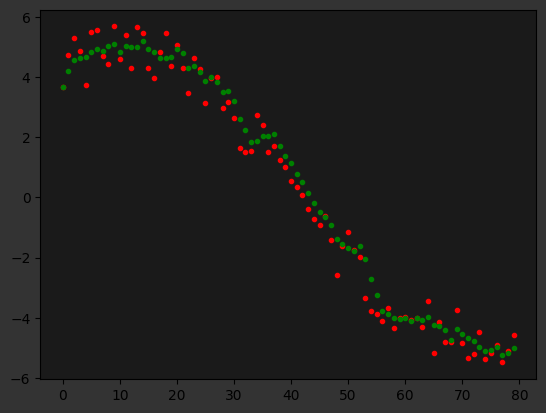

In [5]:
plt.figure(facecolor='0.2')
plt.axes().set_facecolor('0.1')
plt.plot(NC, 'r.', movAvg(NC,4),'g.')
plt.show()

In [6]:
r1 = np.array([1,2,3,4,5,6,7,8])
r2 = np.concatenate((r1[:2], r1[:-2]))
len(r1), len(r2), len(r1[:1]) + len(r1[:-1])

(8, 8, 8)

In [7]:
movAvg(NC,4)[5], NC[2:6].sum() / 4, np.mean(NC[2:6]) #interpretation of movAvg

(4.84471445814082, 4.844714458140819, 4.844714458140819)

-----

In [8]:
#to use pandas method for moving avg your data format has to be pd.Series
import pandas as pd
p_data = pd.Series(NC) 

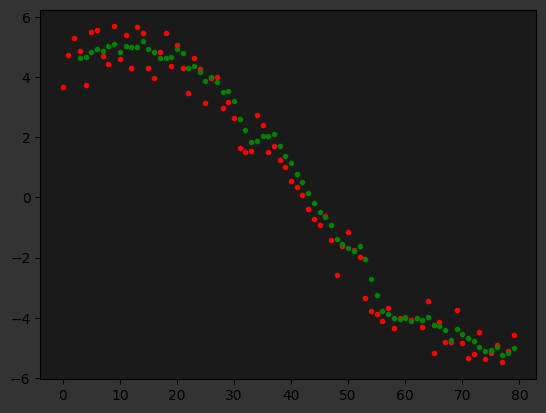

In [9]:
plt.figure(facecolor='0.2')
plt.axes().set_facecolor('0.1')
plt.plot(NC, 'r.', p_data.rolling(window=4).mean(),'g.')
plt.show()

In [22]:
p2 = p_data.rolling(8).mean() 
p_data[:8].sum() / 8, p2[7] #basically it does the same as movAvg

(4.7524016641151, 4.7524016641151)

In [23]:
p2[:10] #But notice

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7    4.752402
8    4.846871
9    4.966369
dtype: float64

In [24]:
#and to fix it
p2[:8] = np.array([(NC[:i+1].sum() / (i+1)) for i in range(8)])
p2[:10]

0    3.659311
1    4.189827
2    4.556517
3    4.636825
4    4.454007
5    4.626419
6    4.761113
7    4.752402
8    4.846871
9    4.966369
dtype: float64

In [13]:
movAvg(NC,8)[:10], p2[:10]

(array([3.65931129, 4.1898266 , 4.5565173 , 4.6368248 , 4.45400733,
        4.6264185 , 4.76111279, 4.75240166, 4.84687079, 4.96636886]),
 0    3.659311
 1    4.189827
 2    4.556517
 3    4.636825
 4    4.454007
 5    4.626419
 6    4.761113
 7    4.752402
 8    4.846871
 9    4.966369
 dtype: float64)

In [16]:
NC

array([ 3.65931129,  4.7203419 ,  5.2898987 ,  4.87774731,  3.72273744,
        5.48847439,  5.56927848,  4.6914238 ,  4.41506427,  5.67632649,
        4.59737455,  5.38485911,  4.31353253,  5.64761771,  5.45913715,
        4.28699355,  3.97332153,  4.83320572,  5.44375732,  4.36727547,
        5.07047457,  4.30583255,  3.47550091,  4.61799134,  4.26336024,
        3.13351678,  3.95267656,  3.99054914,  2.97394107,  3.1639387 ,
        2.64982033,  1.64102477,  1.50031093,  1.54588336,  2.74544854,
        2.40244243,  1.49574827,  1.71711826,  1.24142632,  1.02511459,
        0.54931219,  0.34885108,  0.06818931, -0.36839656, -0.7236691 ,
       -0.91613533, -0.62347382, -1.41248475, -2.56522391, -1.62355595,
       -1.13486544, -1.75936275, -1.96437802, -3.34916432, -3.78023172,
       -3.88577051, -4.09394865, -3.67816876, -4.35213038, -4.00642789,
       -3.95941297, -4.05372799, -4.0130813 , -4.31055815, -3.45551887,
       -5.15017858, -4.14743285, -4.815764  , -4.79091299, -3.72

-----

In [14]:
def window(a,w):
    return np.concatenate((np.full(len(w)-1, float('NaN')),
                    np.convolve(a, w, mode='valid')))

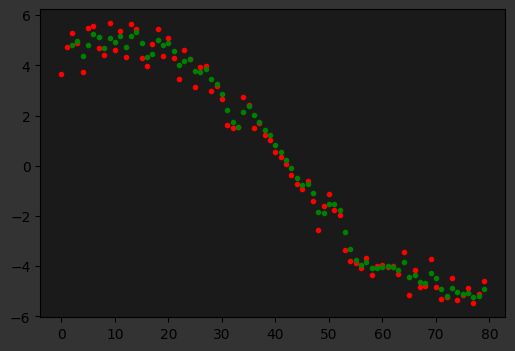

In [15]:
plt.figure(facecolor='0.2',figsize=(6,4))
plt.axes().set_facecolor('0.1')
plt.plot(NC, 'r.', window(NC, [.5, .3333, .1666]) ,'g.')
plt.show()